<a href="https://colab.research.google.com/github/EutruTepit/BigData2022/blob/main/%5BAula_05%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise do *dataset* **Bike Sharing**

Obs: fazer download do seguinte link: https://drive.google.com/file/d/1LOxYZPNuyt5QTQK06V2_6PeMJd9ISgRP/view?usp=sharing

Este dataset contém informações sobre sistemas de compartilhamento de bicicleta, em que um usuário pode pegar uma bicicleta em uma "estação" e devolvê-la em outra "estação".

Contém dados agrupados por dia, incluindo clima principal, temperatura média, velocidade do vento, estação do ano, mês, dia, umidade, entre outras informações.

Estas informações foram coletadas entre 2011 e 2012.



## Carregamento do *dataset*

### Carregamento das libs

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/EutruTepit/BigData2022/main/datasets%20bdda/bike_sharing.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,2011,1,0,saturday,0,cloudy,8.2,8.0,80.6,10.7,331,654,985
1,2,2011-01-02,winter,2011,1,0,sunday,0,cloudy,9.1,7.3,69.6,16.7,131,670,801
2,3,2011-01-03,winter,2011,1,0,monday,1,clear,1.2,-3.5,43.7,16.6,120,1229,1349
3,4,2011-01-04,winter,2011,1,0,tuesday,1,clear,1.4,-2.0,59.0,10.7,108,1454,1562
4,5,2011-01-05,winter,2011,1,0,wednesday,1,clear,2.7,-0.9,43.7,12.5,82,1518,1600


### Shape

In [3]:
df.shape

(731, 16)

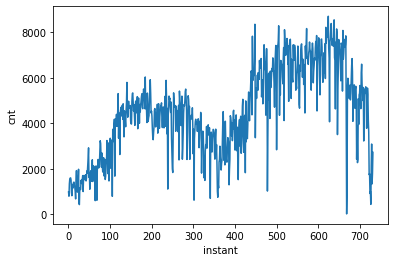

In [4]:
sns.lineplot(data=df, x="instant", y="cnt");

## Caracterização de cada coluna de acordo com os "tipos de variáveis" apresentados:

Contínuo,
Discreto,
Nominais (Categórico)

* instant: **Contínua**
* dteday: **Contínua**
* season: **Discreta**
* yr: **Discreta**
* mnth: **Discreta**
* holiday: **Nominal**
* weekday: **Discreta**
* workingday: **Nominal**
* weathersit: **Nominal**
* temp: **Contínua**
* atemp: **Contínua**
* hum: **Contínua**
* windspeed: **Contínua**
* casual: **Contínuo**
* registered: **Contínuo**
* cnt: **Contínuo**

## Entendimento dos dados

* Fazer análise exploratória
    * Descrição estatística;
    * Visualização utilizando histogramas e boxplot das colunas mais interessantes; 
    * Visualizar correlação
    * Visualizar algumas relações específicas
        * Temperatura x Mês
        * Velocidade do vento x Mês
        * etc

In [5]:
df.describe()

,instant,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,730.000000,730.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2011.500684,6.519836,0.028728,0.683995,15.289315,15.311644,62.788235,12.763748,848.176471,3656.172367,4504.348837
std,211.165812,0.500342,3.451913,0.167155,0.465233,8.606881,10.763227,14.243462,5.192322,686.622488,1560.256377,1937.211452
min,1.000000,2011.000000,1.000000,0.000000,0.000000,-5.200000,-10.800000,0.000000,1.500000,2.000000,20.000000,22.000000
25%,183.500000,2011.000000,4.000000,0.000000,0.000000,7.825000,6.300000,52.000000,9.000000,315.500000,2497.000000,3152.000000
50%,366.000000,2012.000000,7.000000,0.000000,1.000000,15.450000,16.150000,62.700000,12.100000,713.000000,3662.000000,4548.000000
75%,548.500000,2012.000000,10.000000,0.000000,1.000000,22.800000,24.175000,73.000000,15.600000,1096.000000,4776.500000,5956.000000
max,731.000000,2012.000000,12.000000,1.000000,1.000000,32.500000,39.500000,97.200000,34.000000,3410.000000,6946.000000,8714.000000


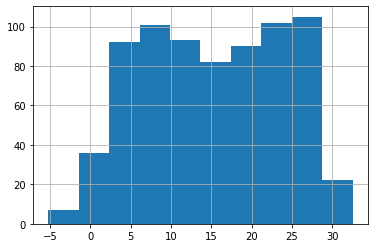

In [6]:
df['temp'].hist();

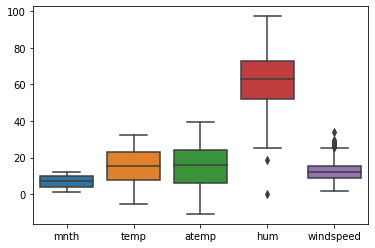

In [7]:
sns.boxplot(data=df.drop(columns=["registered", "cnt", "casual", "instant", "yr", "holiday", "workingday"]));

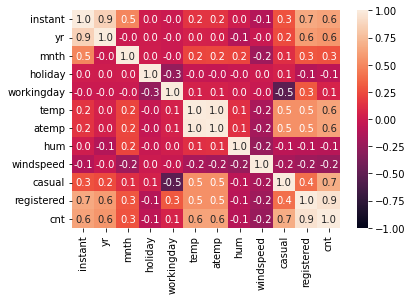

In [8]:
sns.heatmap(df.corr(), vmin=-1, annot=True, fmt=".1f");

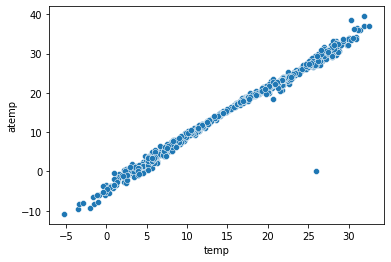

In [9]:
sns.scatterplot(data=df, x="temp", y="atemp");

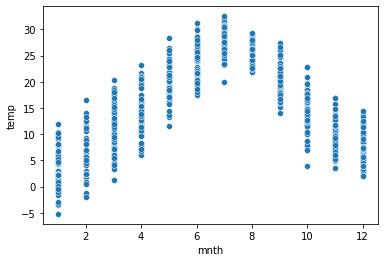

In [10]:
sns.scatterplot(data=df, x="mnth", y="temp");

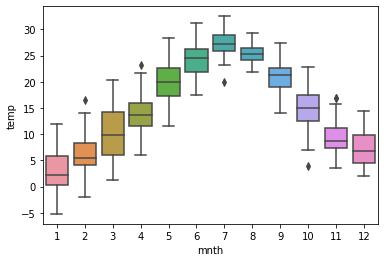

In [11]:
sns.boxplot(data=df, x="mnth", y="temp");

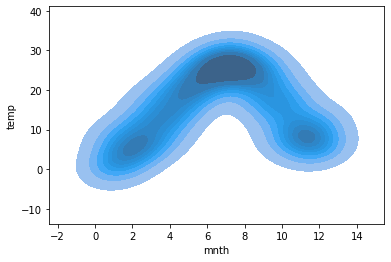

In [12]:
sns.kdeplot(data=df, x="mnth", y="temp", shade=True);

## Seleção vertical e horizontal

### Segmentação 

Buscar apenas pelos dias que são úteis, por exemplo.

In [13]:
df_uteis = df[ df['workingday'] ==1 ]
df_uteis

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2,3,2011-01-03,winter,2011,1,0,monday,1,clear,1.2,-3.5,43.7,16.6,120,1229,1349
3,4,2011-01-04,winter,2011,1,0,tuesday,1,clear,1.4,-2.0,59.0,10.7,108,1454,1562
4,5,2011-01-05,winter,2011,1,0,wednesday,1,clear,2.7,-0.9,43.7,12.5,82,1518,1600
5,6,2011-01-06,winter,2011,1,0,thursday,1,clear,1.6,-0.6,51.8,6.0,88,1518,1606
6,7,2011-01-07,winter,2011,1,0,friday,1,cloudy,1.2,-2.2,49.9,11.3,148,1362,1510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,724,2012-12-24,winter,2012,12,0,monday,1,cloudy,2.9,1.1,79.1,5.2,174,746,920
725,726,2012-12-26,winter,2012,12,0,wednesday,1,light-rs,3.4,-1.5,82.3,21.2,9,432,441
726,727,2012-12-27,winter,2012,12,0,thursday,1,cloudy,3.9,-1.0,65.3,23.5,247,1867,2114
727,728,2012-12-28,winter,2012,12,0,friday,1,cloudy,3.9,0.8,59.0,10.4,644,2451,3095


### Eliminação direta

Eliminar valores correspondentes à sábado e domingo, por exemplo.

In [14]:
df_sem_sabado = df[ df['weekday'] != 'saturday' ]
df_sem_sabado

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2,2011-01-02,winter,2011,1,0,sunday,0,cloudy,9.1,7.3,69.6,16.7,131,670,801
2,3,2011-01-03,winter,2011,1,0,monday,1,clear,1.2,-3.5,43.7,16.6,120,1229,1349
3,4,2011-01-04,winter,2011,1,0,tuesday,1,clear,1.4,-2.0,59.0,10.7,108,1454,1562
4,5,2011-01-05,winter,2011,1,0,wednesday,1,clear,2.7,-0.9,43.7,12.5,82,1518,1600
5,6,2011-01-06,winter,2011,1,0,thursday,1,clear,1.6,-0.6,51.8,6.0,88,1518,1606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,2012-12-26,winter,2012,12,0,wednesday,1,light-rs,3.4,-1.5,82.3,21.2,9,432,441
726,727,2012-12-27,winter,2012,12,0,thursday,1,cloudy,3.9,-1.0,65.3,23.5,247,1867,2114
727,728,2012-12-28,winter,2012,12,0,friday,1,cloudy,3.9,0.8,59.0,10.4,644,2451,3095
729,730,2012-12-30,winter,2012,12,0,sunday,0,clear,4.0,-0.7,48.3,23.5,364,1432,1796


In [15]:
df_sem_domingo = df[ df['weekday'] != 'sunday' ]
df_sem_domingo

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,2011,1,0,saturday,0,cloudy,8.2,8.0,80.6,10.7,331,654,985
2,3,2011-01-03,winter,2011,1,0,monday,1,clear,1.2,-3.5,43.7,16.6,120,1229,1349
3,4,2011-01-04,winter,2011,1,0,tuesday,1,clear,1.4,-2.0,59.0,10.7,108,1454,1562
4,5,2011-01-05,winter,2011,1,0,wednesday,1,clear,2.7,-0.9,43.7,12.5,82,1518,1600
5,6,2011-01-06,winter,2011,1,0,thursday,1,clear,1.6,-0.6,51.8,6.0,88,1518,1606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,2012-12-26,winter,2012,12,0,wednesday,1,light-rs,3.4,-1.5,82.3,21.2,9,432,441
726,727,2012-12-27,winter,2012,12,0,thursday,1,cloudy,3.9,-1.0,65.3,23.5,247,1867,2114
727,728,2012-12-28,winter,2012,12,0,friday,1,cloudy,3.9,0.8,59.0,10.4,644,2451,3095
728,729,2012-12-29,winter,2012,12,0,saturday,0,cloudy,3.9,-0.0,75.3,8.3,159,1182,1341


In [16]:
df_sem_fim_semana = df[ (df['weekday'] != 'sunday') & (df['weekday'] != 'saturday') ]
df_sem_fim_semana

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2,3,2011-01-03,winter,2011,1,0,monday,1,clear,1.2,-3.5,43.7,16.6,120,1229,1349
3,4,2011-01-04,winter,2011,1,0,tuesday,1,clear,1.4,-2.0,59.0,10.7,108,1454,1562
4,5,2011-01-05,winter,2011,1,0,wednesday,1,clear,2.7,-0.9,43.7,12.5,82,1518,1600
5,6,2011-01-06,winter,2011,1,0,thursday,1,clear,1.6,-0.6,51.8,6.0,88,1518,1606
6,7,2011-01-07,winter,2011,1,0,friday,1,cloudy,1.2,-2.2,49.9,11.3,148,1362,1510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,725,2012-12-25,winter,2012,12,1,tuesday,0,cloudy,5.7,3.4,73.5,11.3,440,573,1013
725,726,2012-12-26,winter,2012,12,0,wednesday,1,light-rs,3.4,-1.5,82.3,21.2,9,432,441
726,727,2012-12-27,winter,2012,12,0,thursday,1,cloudy,3.9,-1.0,65.3,23.5,247,1867,2114
727,728,2012-12-28,winter,2012,12,0,friday,1,cloudy,3.9,0.8,59.0,10.4,644,2451,3095


## Seleção vertical

Eliminar colunas que nada ajudam a identificar padrões ou que não são mais úteis.

In [17]:
df_novo = df.drop(columns=['instant', 'dteday'])
df_novo.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,winter,2011,1,0,saturday,0,cloudy,8.2,8.0,80.6,10.7,331,654,985
1,winter,2011,1,0,sunday,0,cloudy,9.1,7.3,69.6,16.7,131,670,801
2,winter,2011,1,0,monday,1,clear,1.2,-3.5,43.7,16.6,120,1229,1349
3,winter,2011,1,0,tuesday,1,clear,1.4,-2.0,59.0,10.7,108,1454,1562
4,winter,2011,1,0,wednesday,1,clear,2.7,-0.9,43.7,12.5,82,1518,1600


## Tratamento de dados faltantes (*missing data*)

Técnicas mais comuns:
* Exclusão;
* Preenchimento manual;
* Preenchimento com constantes;
* Preenchimento com medidas estatísticas;
* Preenchimento com técnicas de mineração de dados.


### Detecção de dados faltantes

In [18]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          1
atemp         1
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [19]:
df[ df['temp'].isna() ]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
310,311,2011-11-07,fall,2011,11,0,monday,1,clear,NaN,NaN,75.9,3.8,373,3662,4035


In [20]:
df[ df['atemp'].isna() ]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
310,311,2011-11-07,fall,2011,11,0,monday,1,clear,NaN,NaN,75.9,3.8,373,3662,4035


### Exclusão

In [21]:
df_sem_faltantes = df.drop(310, axis=0)
df_sem_faltantes.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [22]:
df_sem_faltantes.iloc[309:312]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
309,310,2011-11-06,fall,2011,11,0,sunday,0,clear,8.4,7.9,73.5,6.2,952,2697,3649
311,312,2011-11-08,fall,2011,11,0,tuesday,1,clear,11.2,11.2,72.2,4.6,376,3829,4205
312,313,2011-11-09,fall,2011,11,0,wednesday,1,clear,10.8,11.0,75.8,4.2,305,3804,4109


### Preenchimento com constantes

In [23]:
df_ = df.copy()

df_['temp'] = df_['temp'].fillna(999)
df_['atemp'] = df_['atemp'].fillna(999)
df_.iloc[310]

instant              311
dteday        2011-11-07
season              fall
yr                  2011
mnth                  11
holiday                0
weekday           monday
workingday             1
weathersit         clear
temp               999.0
atemp              999.0
hum                 75.9
windspeed            3.8
casual               373
registered          3662
cnt                 4035
Name: 310, dtype: object

### Preenchimento com medidas estatísticas

In [24]:
df_ = df.copy()

df_['temp'] = df_['temp'].fillna(df_['temp'].mean())
df_['atemp'] = df_['atemp'].fillna(df_['atemp'].mean())
df_.iloc[310] 

instant              311
dteday        2011-11-07
season              fall
yr                  2011
mnth                  11
holiday                0
weekday           monday
workingday             1
weathersit         clear
temp           15.289315
atemp          15.311644
hum                 75.9
windspeed            3.8
casual               373
registered          3662
cnt                 4035
Name: 310, dtype: object

### Preenchimento com técnicas avançadas

* Interpolação (método para DataFrames)

In [25]:
df_ = df.copy()

df_['temp'] = df_['temp'].interpolate()
df_['atemp'] = df_['atemp'].interpolate()
df_.iloc[310]

instant              311
dteday        2011-11-07
season              fall
yr                  2011
mnth                  11
holiday                0
weekday           monday
workingday             1
weathersit         clear
temp                 9.8
atemp               9.55
hum                 75.9
windspeed            3.8
casual               373
registered          3662
cnt                 4035
Name: 310, dtype: object

### Preenchimento com técnicas de mineração de dados

1. Treina um modelo utilizando as colunas mais importantes como *entrada* e a coluna com valores faltantes como *saída*. (obs.: Utiliza-se apenas os valores que estão presentes)
2. Preenche os valores faltantes com a estimativa fornecida pelo modelo no passo 1.

## Codificação de dados

### Numérico -> Categórico

#### Mapeamento direto

In [26]:
df_['workingday'] = df_['workingday'].map({
    0: "Não",
    1: "Sim"
})

df_.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,2011,1,0,saturday,Não,cloudy,8.2,8.0,80.6,10.7,331,654,985
1,2,2011-01-02,winter,2011,1,0,sunday,Não,cloudy,9.1,7.3,69.6,16.7,131,670,801
2,3,2011-01-03,winter,2011,1,0,monday,Sim,clear,1.2,-3.5,43.7,16.6,120,1229,1349
3,4,2011-01-04,winter,2011,1,0,tuesday,Sim,clear,1.4,-2.0,59.0,10.7,108,1454,1562
4,5,2011-01-05,winter,2011,1,0,wednesday,Sim,clear,2.7,-0.9,43.7,12.5,82,1518,1600


#### Mapeamento por intervalos

In [27]:
def converte(x):
    if 22 <= x < 2000:
        return "pouco"
    
    if 2000 <= x < 6000:
        return "medio"

    return "muito"    

In [28]:
df_["cnt_conv"] = df_["cnt"].apply(converte)
df_.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,cnt_conv
0,1,2011-01-01,winter,2011,1,0,saturday,Não,cloudy,8.2,8.0,80.6,10.7,331,654,985,pouco
1,2,2011-01-02,winter,2011,1,0,sunday,Não,cloudy,9.1,7.3,69.6,16.7,131,670,801,pouco


In [29]:
df_['cnt_conv_conv'] = df_['cnt_conv'].map({
    "pouco": 0,
    "medio": 1,
    "muito": 2
})

df_.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,cnt_conv,cnt_conv_conv
0,1,2011-01-01,winter,2011,1,0,saturday,Não,cloudy,8.2,8.0,80.6,10.7,331,654,985,pouco,0
1,2,2011-01-02,winter,2011,1,0,sunday,Não,cloudy,9.1,7.3,69.6,16.7,131,670,801,pouco,0


### Categórico -> Numérico

#### Representação 1-de-N (dummies)

In [30]:
df_season = pd.get_dummies(df_["season"])
df_ = df_.join(df_season)
df_.sample(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,windspeed,casual,registered,cnt,cnt_conv,cnt_conv_conv,fall,spring,summer,winter
468,469,2012-04-13,spring,2012,4,0,friday,Sim,clear,12.8,...,10.4,1252,5146,6398,muito,2,0,1,0,0
117,118,2011-04-28,spring,2011,4,0,thursday,Sim,cloudy,21.0,...,21.5,569,3489,4058,medio,1,0,1,0,0


In [31]:
df_.drop(columns=["season"], inplace=True)

## Normalização

### Normalização linear (MinMaxScaler)
Visualizar correlação após

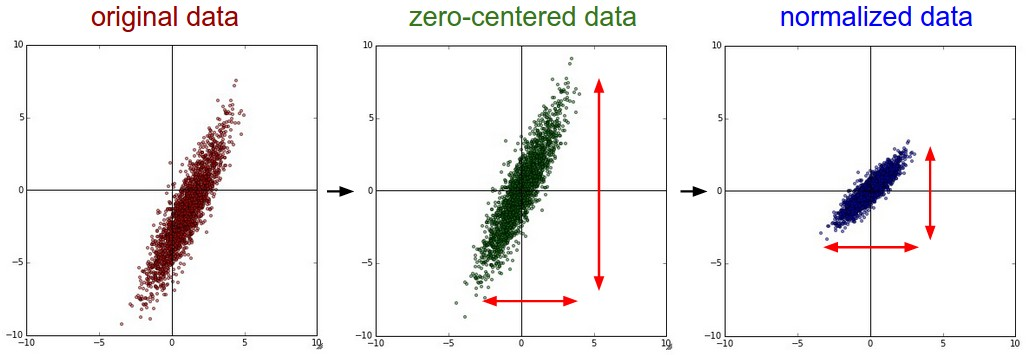

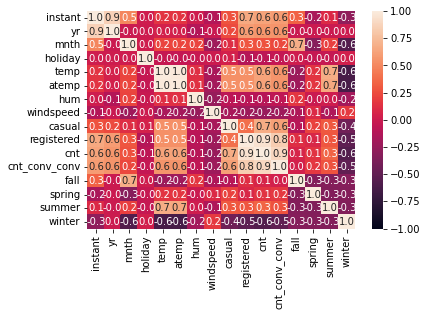

In [32]:
sns.heatmap(df_.corr(), vmin=-1, annot=True, fmt=".1f");

In [33]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
df_['temp'] = mm.fit_transform( df_[['temp']] )
df_.head(2)

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,windspeed,casual,registered,cnt,cnt_conv,cnt_conv_conv,fall,spring,summer,winter
0,1,2011-01-01,2011,1,0,saturday,Não,cloudy,0.355438,8.0,...,10.7,331,654,985,pouco,0,0,0,0,1
1,2,2011-01-02,2011,1,0,sunday,Não,cloudy,0.379310,7.3,...,16.7,131,670,801,pouco,0,0,0,0,1


### Normalização por desvio padrão
Visualizar correlação após

In [34]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df_['atemp'] = ss.fit_transform( df_[['atemp']] )
df_.head(2)

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,windspeed,casual,registered,cnt,cnt_conv,cnt_conv_conv,fall,spring,summer,winter
0,1,2011-01-01,2011,1,0,saturday,Não,cloudy,0.355438,-0.679382,...,10.7,331,654,985,pouco,0,0,0,0,1
1,2,2011-01-02,2011,1,0,sunday,Não,cloudy,0.379310,-0.744494,...,16.7,131,670,801,pouco,0,0,0,0,1


https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

## Remover colunas inúteis para a ML



---

## Uso de PCA


## Carregamento do dataset e Bibliotecas

In [35]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

## Visualização de alguns números

Usar reshape e cmap = plt.cm.binary_r

In [36]:
dados = load_digits()
digitos = pd.DataFrame(dados.data)
digitos.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [37]:
rotulos = dados.target

Rótulo: 5


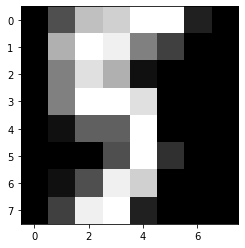

In [40]:
import matplotlib.pyplot as plt

indice = 15
imagem0 = digitos.iloc[indice].values
imagem0 = np.reshape(imagem0, (8, 8) )
plt.imshow(imagem0, cmap=plt.cm.binary_r)

print(f"Rótulo: {rotulos[indice]}")

## Normalizar 

- Requisito para o PCA

In [41]:
ss = StandardScaler()

df_normalizado = ss.fit_transform(digitos)
df_normalizado = pd.DataFrame(df_normalizado)
df_normalizado.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,-0.335016,-0.043081,0.274072,-0.664478,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,0.086719,0.208293,-0.366771,-1.146647,-0.505670,-0.196008
1,0.0,-0.335016,-1.094937,0.038648,0.268751,-0.138020,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-0.249010,0.849632,0.548561,-0.505670,-0.196008
2,0.0,-0.335016,-1.094937,-1.844742,0.735366,1.097673,-0.409724,-0.125023,-0.059078,-0.624009,...,0.259230,-0.209785,-0.023596,-0.299081,-1.089383,-2.078218,-0.164037,1.565686,1.695137,-0.196008
3,0.0,-0.335016,0.377661,0.744919,0.268751,-0.844129,-0.409724,-0.125023,-0.059078,1.879691,...,1.072563,-0.209785,-0.023596,-0.299081,0.282736,0.208293,0.241430,0.379040,-0.505670,-0.196008
4,0.0,-0.335016,-1.094937,-2.551014,-0.197863,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-2.306869,0.849632,-0.468564,-0.505670,-0.196008


Rótulo: 5


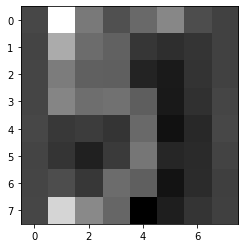

In [43]:
indice = 15
imagem0 = df_normalizado.iloc[indice].values
imagem0 = np.reshape(imagem0, (8, 8) )
plt.imshow(imagem0, cmap=plt.cm.binary_r)

print(f"Rótulo: {rotulos[indice]}")

## Aplicar o PCA

In [44]:
pca = PCA(n_components=2)

df_pca = pca.fit_transform(df_normalizado)
df_pca = pd.DataFrame(df_pca)

df_pca.head()

,0,1
0,1.914210,-0.954487
1,0.588985,0.924612
2,1.302037,-0.317250
3,-3.020768,-0.868748
4,4.528945,-1.093469


## Visualizar os componentes

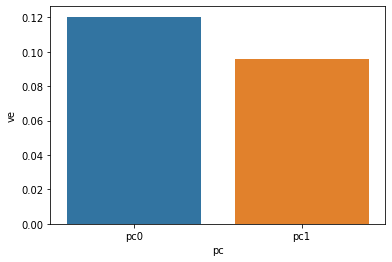

In [49]:
df_aux = pd.DataFrame({})
df_aux["ve"] = pca.explained_variance_ratio_
df_aux["pc"] = [ f"pc{i}" for i in range(pca.n_components_) ]

sns.barplot(data=df_aux, x="pc", y="ve");

## Verificar a variância_explicada e o número de componentes

In [46]:
pca.explained_variance_ratio_

array([0.12033916, 0.09561054])

In [47]:
sum(pca.explained_variance_ratio_)

0.2159497049907636

In [48]:
pca.n_components_

2